In [ ]:
#Parameters - Hyper-parameters
#Hyperparameters - Reponsible for deciding how quicky a model can fit into our data
#Not propertuning - Overfitting / Underfitting
#1. Increase Model Accuracy - Max_features, n_estimators, min_sample_leaf
#2. Increase Model Training ease - oob_score, n_jobs, random_state

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
corr = data.corr()
corr.shape

<ipython-input-10-34da0ae0a747>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


(32, 32)

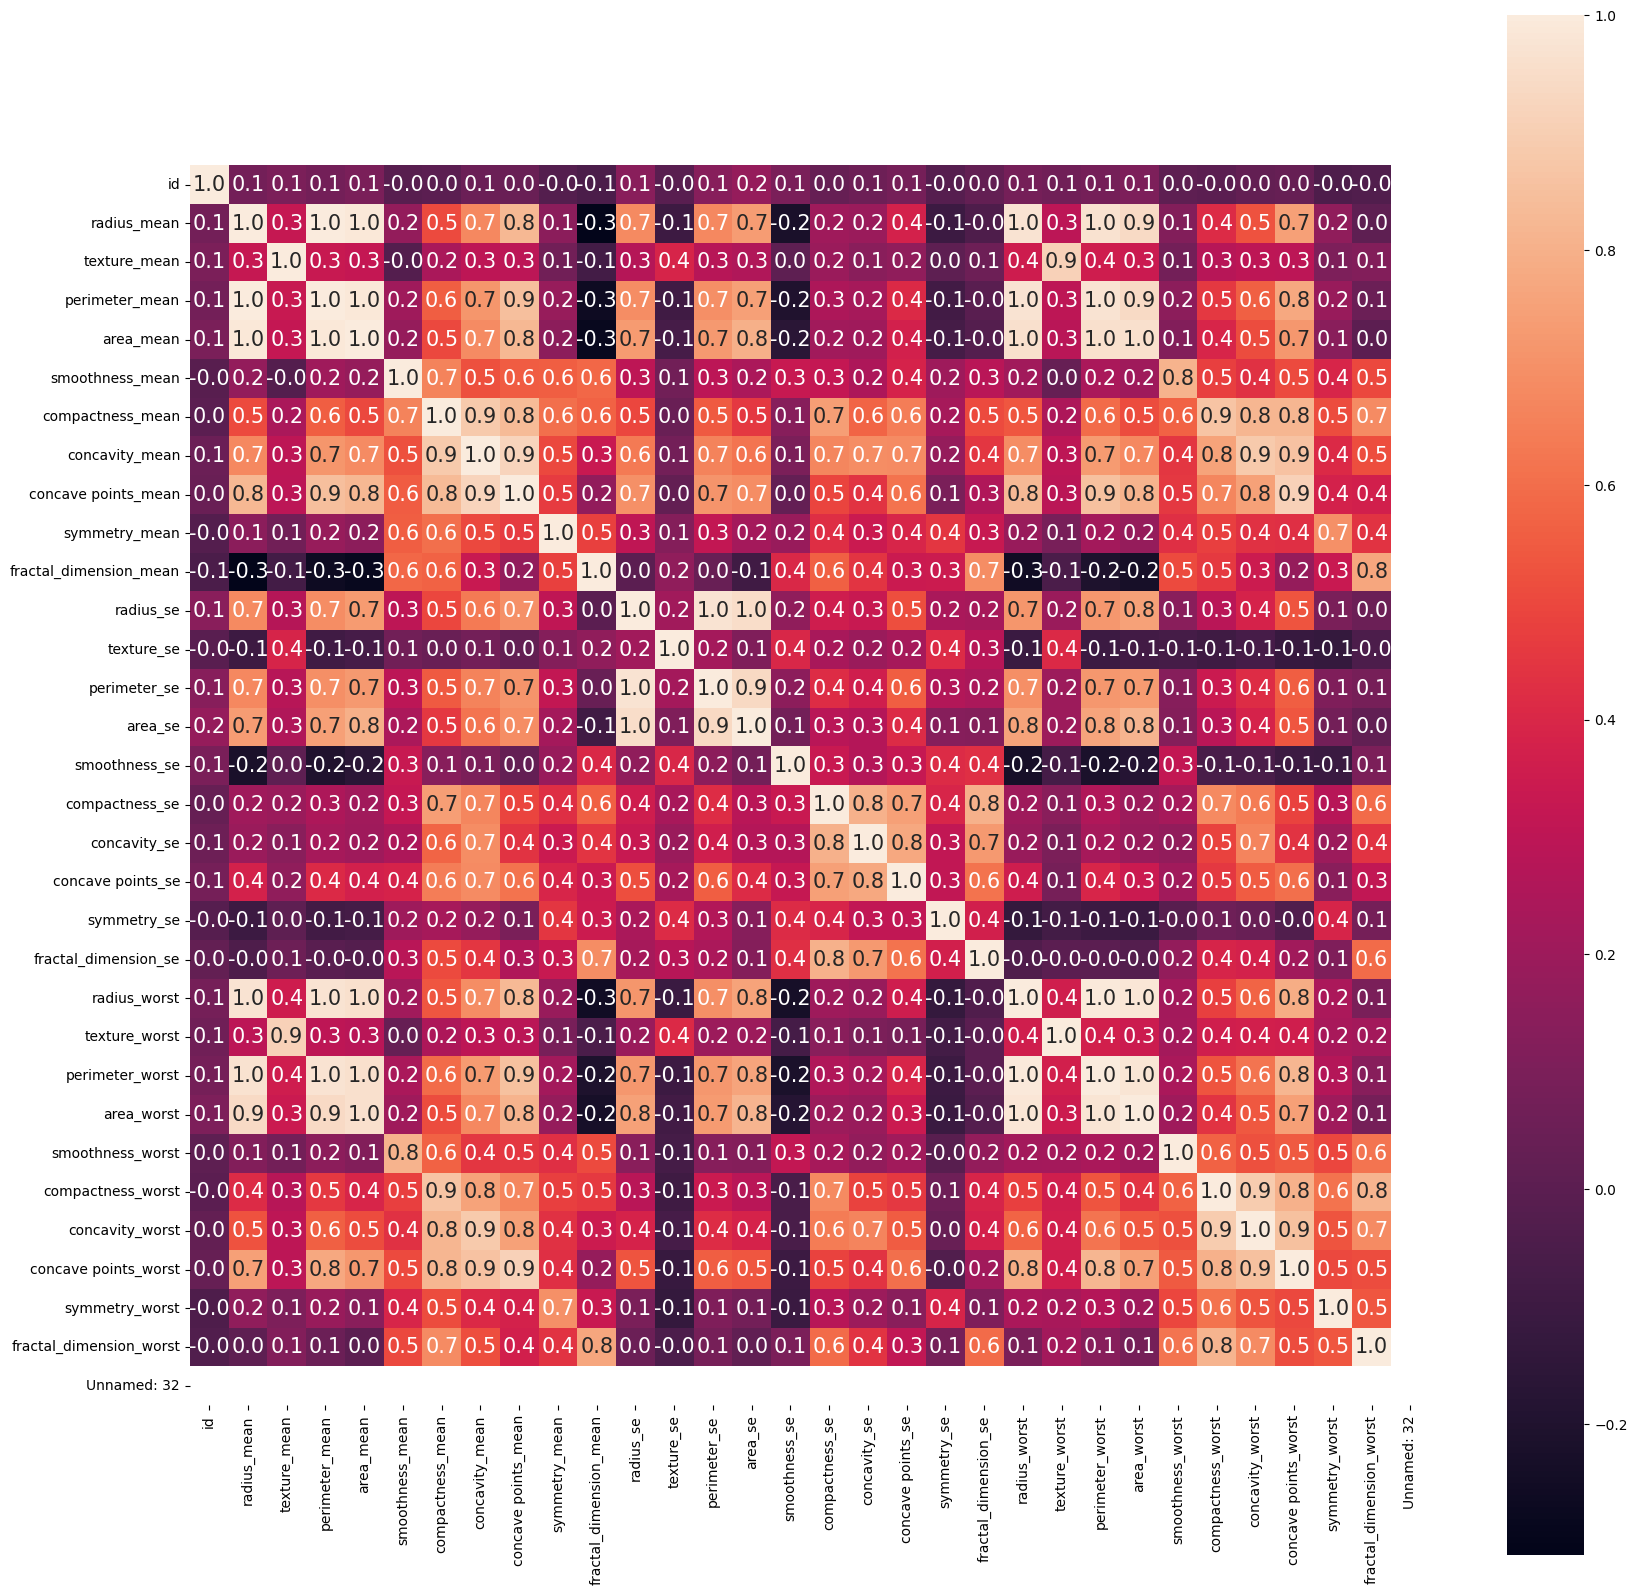

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar = True, square = True, fmt='.1f',annot=True,annot_kws={'size':15})
plt.show()

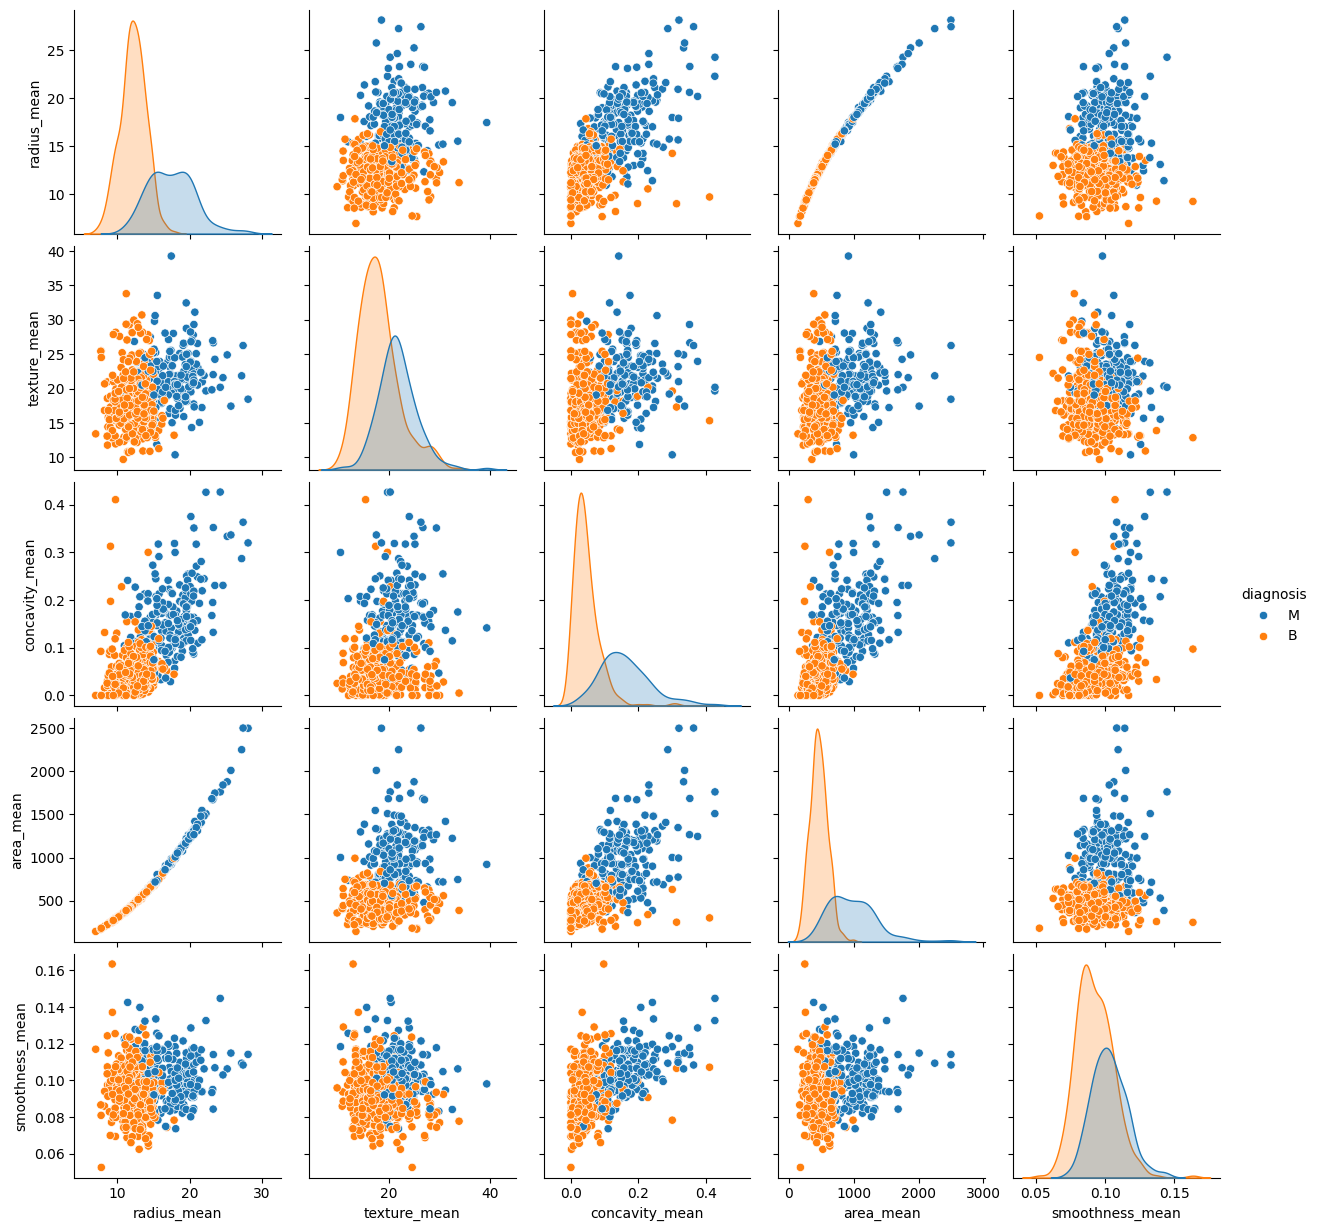

In [ ]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean','texture_mean','concavity_mean','area_mean','smoothness_mean'])

In [ ]:
data.drop(['Unnamed: 32','id'], axis = 1,inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['diagnosis'],axis = 1)
y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
acc_log = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of LOG REG without hyp: ', acc_log)

Accuracy of LOG REG without hyp:  94.74


In [ ]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
acc_nb = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of NB without hyp: ', acc_nb)

Accuracy of NB without hyp:  92.98


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of DT without hyp: ', acc_dt)

Accuracy of DT without hyp:  90.35


In [ ]:
parameters = {
    "max_features":['log2','sqrt','auto'],
    'criterion':['entropy','gini'],
    'max_depth':[3,5,10,20,30,40,50],
    'min_samples_split':[2,3,50,75,100],
    'min_samples_leaf':[1,5,7,9,10]
}

In [ ]:
grid_obj = GridSearchCV(dt,parameters)
grid_obj = grid_obj.fit(x_train,y_train)

print(grid_obj.best_estimator_)

In [ ]:
grid_obj.fit(x_train,y_train)

In [ ]:
df_bestparams = grid_obj.best_estimator_

In [ ]:
df_bestparams.fit(x_train,y_train)

In [ ]:
df_bestparams.predict(x_test)

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [ ]:
y_pred = df_bestparams.predict(x_test)
acc_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of DT with hyp: ', acc_dt)

Accuracy of DT with hyp:  97.37


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {
    'n_estimators':[5,10,15,20,25],
    "max_features":['log2','sqrt','auto'],
    'criterion':['entropy','gini'],
    'max_depth':[2,5,8,10,15],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

grid_obj = GridSearchCV(rf,parameters)
grid_obj = grid_obj.fit(x_train,y_train)

best_rf = grid_obj.best_estimator_

best_rf.fit(x_train,y_train)

In [ ]:
y_pred = best_rf.predict(x_test)
acc_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of RF with hyp: ', acc_dt)

Accuracy of RF with hyp:  97.37


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

parameters = {
    'n_neighbors':[3,5,7,9,11],
    "weights":['uniform','distance'],
    'algorithm':['auto','kd_tree','brute'],
    'leaf_size':[10,20,30,50]
}

grid_obj = GridSearchCV(KNN,parameters)
grid_obj = grid_obj.fit(x_train,y_train)

best_knn = grid_obj.best_estimator_

best_knn.fit(x_train,y_train)

y_pred = best_knn.predict(x_test)
acc_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of KNN with hyp: ', acc_dt)

Accuracy of KNN with hyp:  96.49
